In [1]:
from utils import Portfolio
import pandas as pd 
from IPython.display import display

In [2]:
nifty_df = pd.read_csv('nifty_500.csv')
nifty_df.head()

,Company Name,Industry,Symbol,Series,ISIN Code
0,3M India,Diversified,3MINDIA,EQ,INE470A01017
1,ABB India,Capital Goods,ABB,EQ,INE117A01022
2,ACC,Construction Materials,ACC,EQ,INE012A01025
3,AIA Engineering,Capital Goods,AIAENG,EQ,INE212H01026
4,APL Apollo Tubes,Capital Goods,APLAPOLLO,EQ,INE702C01027


In [3]:
stocks = nifty_df['Symbol'].tolist()

In [4]:
portfolio = Portfolio(stocks=stocks)

[*********************100%***********************]  500 of 500 completed
Portfolio()


# Efficient portfolio frontier

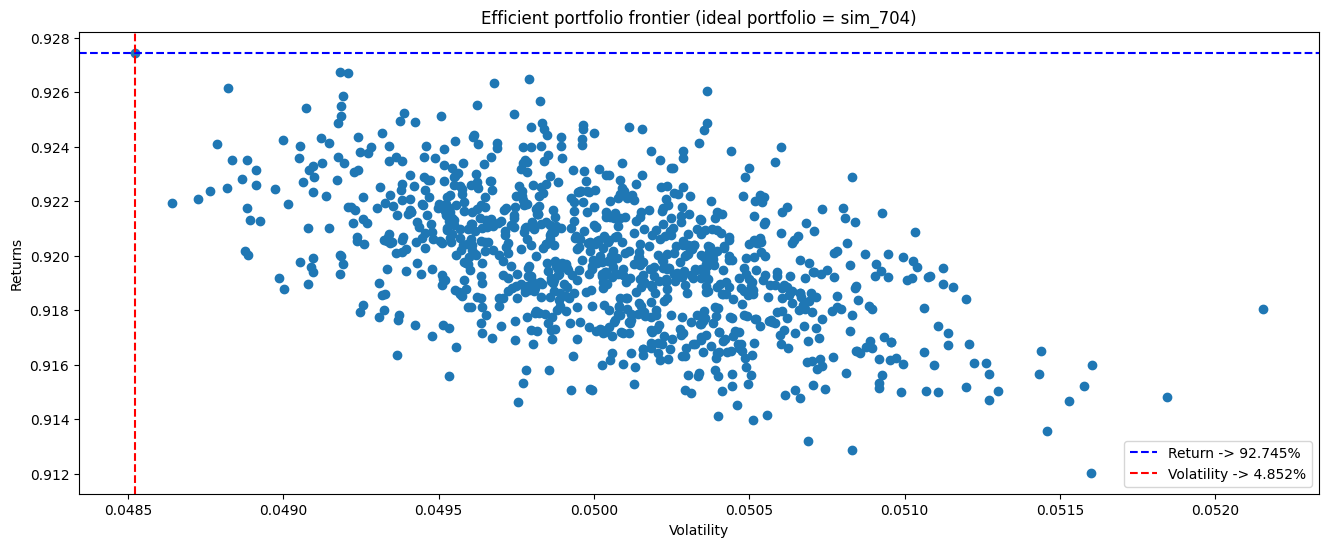

In [5]:
portfolio.see_frontier()

# Descriptive statistics about the portfolio

In [6]:
info = portfolio.describe()

Metric                    Values
------------------  ------------
Average                0.919956
Standard Deviation     0.0499384
Market Return        230.544
Excess Return         -0.117801
Beta                   1.1985
Sharpe Ratio          17.2203
Treynors Ratio         0.717526
Jensens Alpha       -275.375
Information Ratio     -7.30009


# Clustering for portfolio optimization 

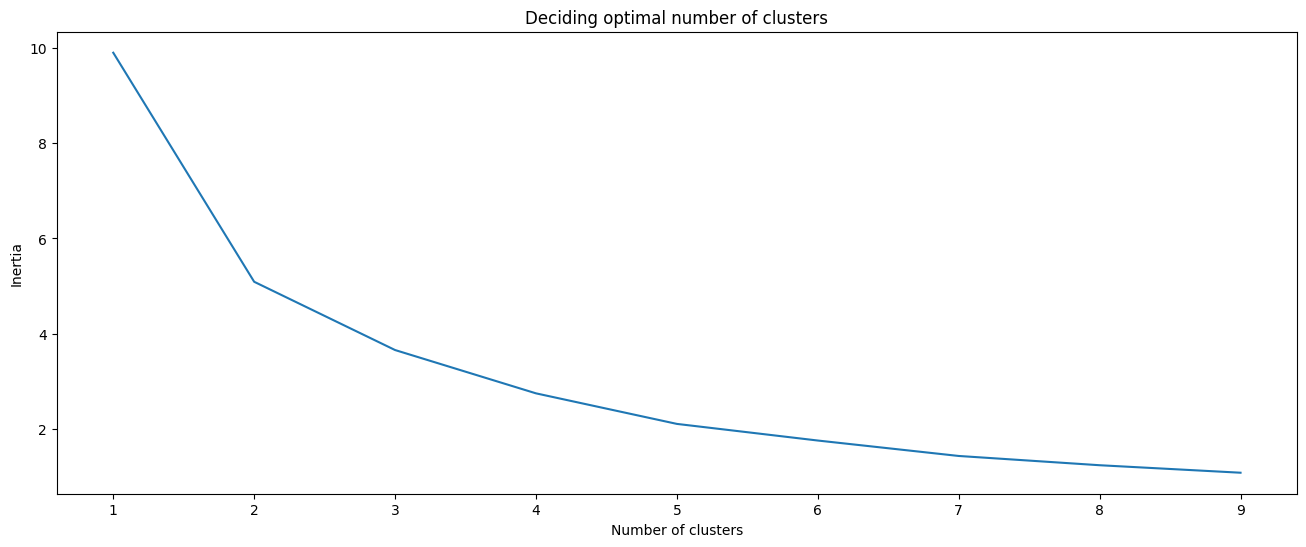

In [7]:
portfolio.find_clusters()

In [11]:
# From this graph, we can see that 5 clusters are optimal for portfolio diversification 
portfolio.cluster(k=3)

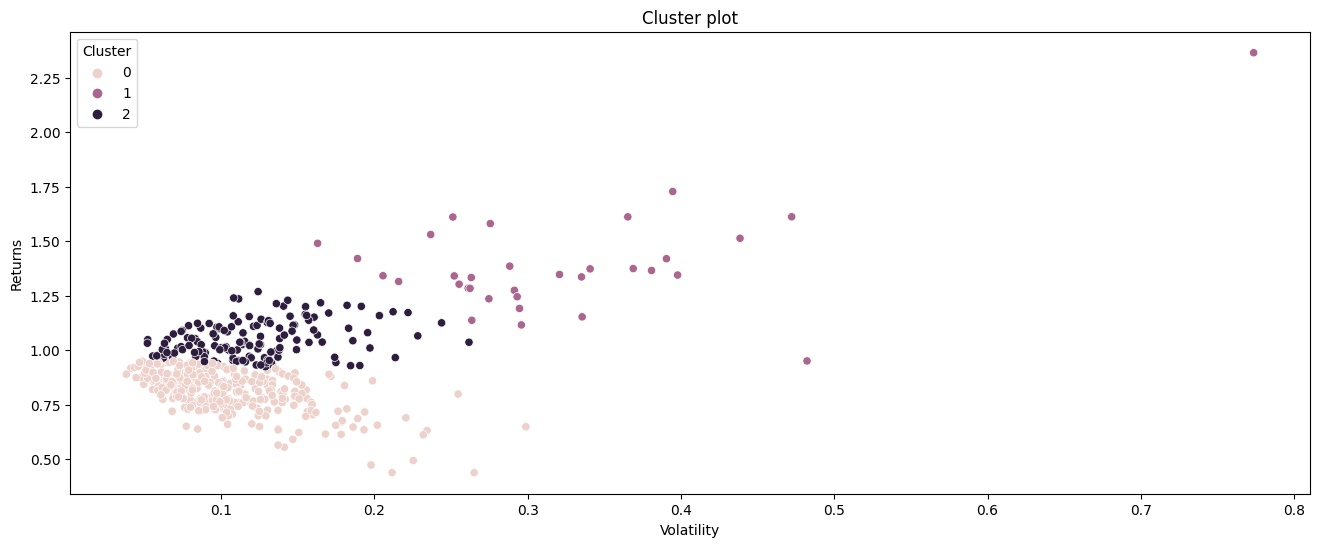

In [12]:
portfolio.visualize_clusters()

In [13]:
summary_df = portfolio.cluster_df.copy()
summary_df['Sector'] = nifty_df['Industry']
for cluster in summary_df['Cluster'].unique():
    cluster_df = summary_df[summary_df['Cluster'] == cluster]
    print(f'Cluster -> {cluster}')
    display(cluster_df.head(5))

Cluster -> 0


,Symbol,Returns,Volatility,Cluster,Sector
0,3MINDIA.NS,0.862991,0.090999,0,Diversified
1,AARTIDRUGS.NS,0.756390,0.087666,0,Capital Goods
2,AAVAS.NS,0.837504,0.110844,0,Construction Materials
4,ABBOTINDIA.NS,0.852253,0.056146,0,Capital Goods
7,ABSLAMC.NS,0.732362,0.099312,0,Financial Services


Cluster -> 1


,Symbol,Returns,Volatility,Cluster,Sector
3,ABB.NS,1.314433,0.215821,1,Capital Goods
9,ADANIENT.NS,1.365026,0.380803,1,Metals & Mining
10,ADANIGREEN.NS,1.610959,0.365328,1,Power
12,ADANITRANS.NS,1.419036,0.390541,1,Oil Gas & Consumable Fuels
32,ASAHIINDIA.NS,1.340926,0.205597,1,Automobile and Auto Components


Cluster -> 2


,Symbol,Returns,Volatility,Cluster,Sector
5,ABCAPITAL.NS,1.019766,0.095796,2,Financial Services
6,ABFRL.NS,1.058300,0.096504,2,Healthcare
8,ACC.NS,0.974426,0.058579,2,Healthcare
14,AEGISCHEM.NS,1.005388,0.124008,2,Financial Services
15,AFFLE.NS,1.010445,0.100085,2,Consumer Services
